# Environment setup

### Library preparation

In [25]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
import pandas as pd
import pandas as pd
pd.set_eng_float_format(accuracy=1, use_eng_prefix=True)

import numpy as np

import os

import matplotlib.pyplot as plt

import qcodes as qc
from qcodes.dataset.plotting import plot_by_id, get_data_by_id, plot_dataset
from qcodes.dataset.data_set import load_by_id
from qcodes.instrument.parameter import Parameter


from si_prefix import si_format as SI

In [36]:
import sys 
sys.path.append('..\..\_jjtools')

# from Exps import *

from JJ_data_processing import read_opj_data, pbi, bpbi, show_df, update_df

from JJformulas import *
from meas_util import *

from JJmeasurement import *

### Database ini

In [28]:
SAMPLE = 'D060B2N7'

jj = JJmeas(sample = SAMPLE)

jj.db_connect()

# Sample discription and runid matrix

In [49]:
ft = pd.read_excel("..\chain table.xlsx")


In [30]:
show_df(ft, 
         find = SAMPLE
         )

,#par,#ser,Ajj,Isw,Rn_tot,RoFF,RoZF,Vo_tot,dsgn,status


# Import from origin

In [7]:
Vmock = Parameter(name = 'Voltage', label = 'Voltage', unit = 'V')
Imock = Parameter(name = 'Current', label = 'Current', unit = 'A')

In [14]:
x, y = read_opj_data(cols = (4,5), preprint = False)

Starting experimental run with id: 3


<IPython.core.display.Javascript object>


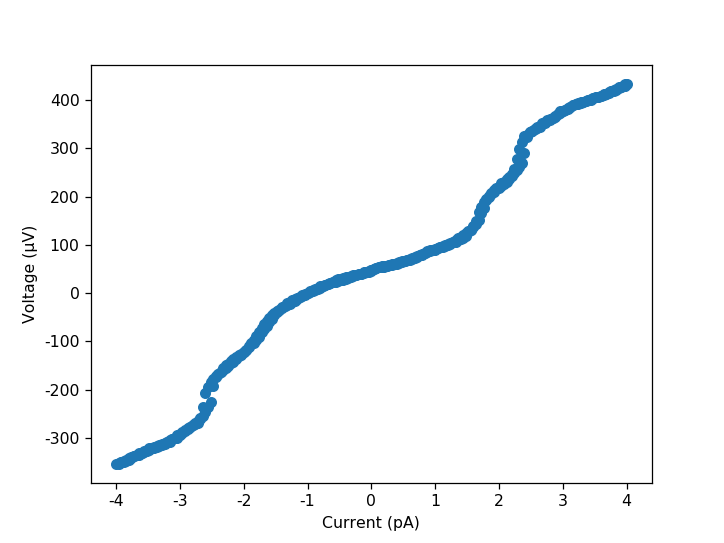

In [15]:
runid = jj.mock_meas( x = (Imock, x), y = (Vmock, y) , label = 'IVC fine')
pbi(runid)

# Report

## Overview IVC

<IPython.core.display.Javascript object>


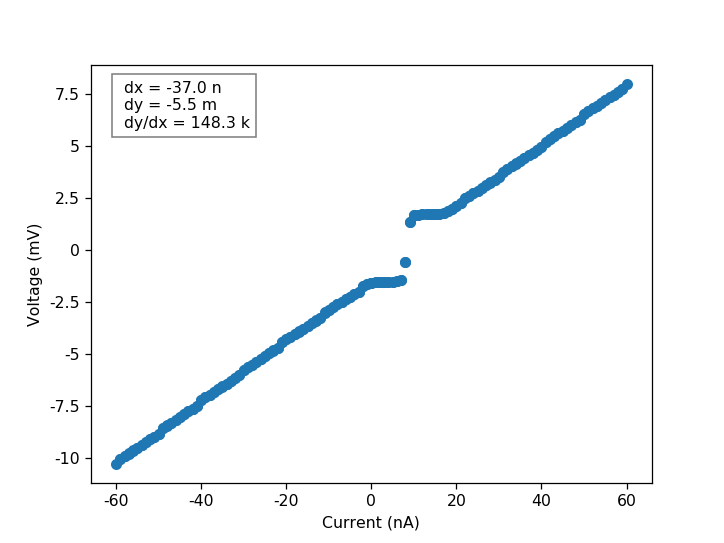

In [10]:
pbi(1, interactive = True)

**Vg = 1.6 mV**

**N = 4**

**Rn_tot = 148k**


<IPython.core.display.Javascript object>


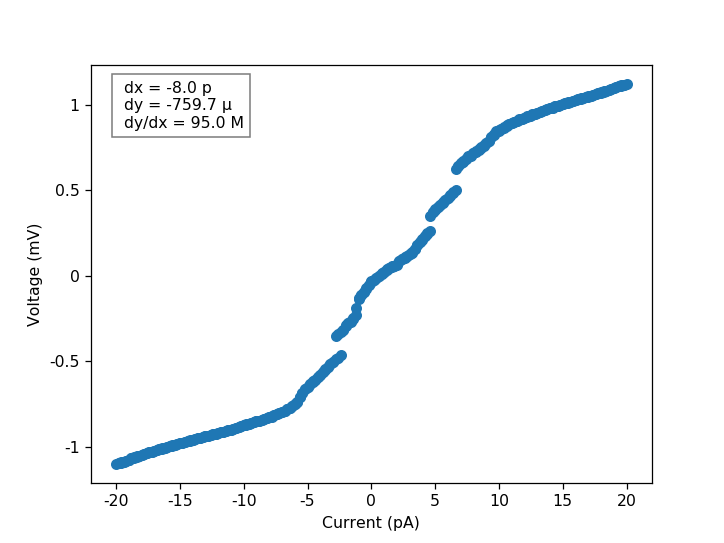

In [13]:
pbi(2, interactive = True)

## IVC fine scan

<IPython.core.display.Javascript object>


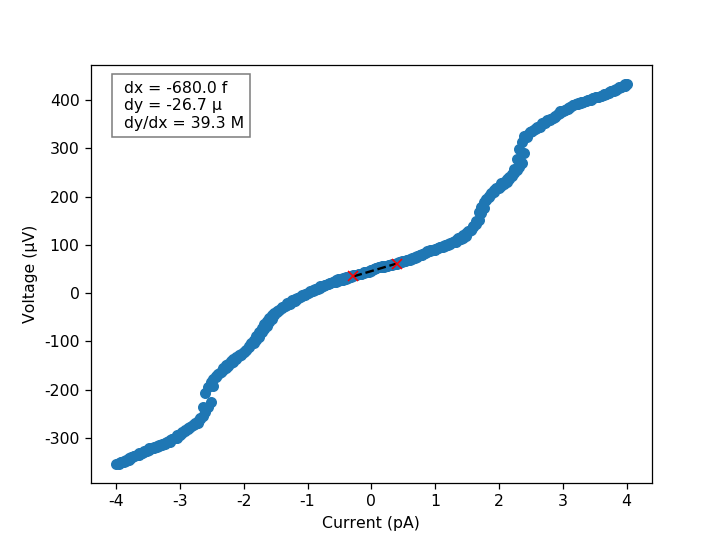

In [16]:
pbi(3, interactive = True)

**Ro_tot = 41 MOhm**

**Isw = 1.6pA**

**Vch = 140uV**

# Data update

In [54]:
ft = pd.read_excel("..\chain table.xlsx")

show_df(ft,
       find = SAMPLE)

,Ajj,Ec,Ej,Iab,Isw,N,Npar,Rn,Rn_tot,Ro,RoFF,Ro_tot,Vo_tot,dsgn,status,wp


In [55]:
ft = update_df(ft, SAMPLE, 
         
          {'Rn_tot'  : 148e3,
           'Ro_tot'  : 41e6,
           'Isw'     : 1.6e-12,
           'N'       : 4,
           'status'  : 'measd_lv'}
         )


show_df(ft,
       find = SAMPLE)

,Ajj,Ec,Ej,Iab,Isw,N,Npar,Rn,Rn_tot,Ro,RoFF,Ro_tot,Vo_tot,dsgn,status,wp
D060B2N7,NaN,NaN,183.1m,7.7n,1.6p,4.0,NaN,37.0k,148.0k,10.2M,NaN,41.0M,NaN,NaN,measd_lv,NaN


In [56]:
ft.to_excel("..\chain table.xlsx")